# Neural Network

In [3]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import pandas as pd
import seaborn as sns


In [4]:
particle_df = pd.read_csv('data/training.csv')

In [61]:
particle_df['Label'].unique()
particle_df.columns

Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElectron', 'MuonLooseFlag',
       'FlagSpd', 'SpdE', 'EcalDLLbeElectron', 'DLLmuon', 'RICHpFlagElectron',
       'EcalDLLbeMuon', 'TrackQualitySubdetector2', 'FlagPrs', 'DLLelectron',
       'DLLkaon', 'EcalE', 'TrackQualityPerNDoF', 'DLLproton',
       'PrsDLLbeElectron', 'FlagRICH1', 'MuonLLbeBCK', 'FlagHcal',
       'EcalShowerLongitudinalParameter', 'Calo2dFitQuality', 'TrackPt',
       'TrackDistanceToZ', 'RICHpFlagPion', 'HcalDLLbeElectron',
       'Calo3dFitQuality', 'FlagEcal', 'MuonLLbeMuon', 'TrackNDoFSubdetector1',
       'RICHpFlagProton', 'RICHpFlagKaon', 'GhostProbability',
       'TrackQualitySubdetector1', 'Label', 'RICH_DLLbeBCK', 'FlagRICH2',
       'FlagBrem', 'HcalDLLbeMuon', 'TrackNDoF', 'RICHpFlagMuon',
       'RICH_DLLbeKaon', 'RICH_DLLbeElectron', 'HcalE', 'MuonFlag', 'FlagMuon',
       'PrsE', 'RICH_DLLbeMuon', 'RICH_DLLbeProton'],
      dtype='object')

In [7]:
# 50 inputs, 6 outputs
model1 = MLPClassifier(hidden_layer_sizes=[20, 30, 40], max_iter=500)
model2 = MLPClassifier(hidden_layer_sizes=[30, 50, 30], max_iter=500)
model3 = MLPClassifier(hidden_layer_sizes=[30, 50, 30, 50], max_iter=500)
model4 = MLPClassifier(hidden_layer_sizes=[50, 30, 50, 30], max_iter=500)
model5 = MLPClassifier(hidden_layer_sizes=[50, 40, 40], max_iter=500)



In [50]:
for i in range(1, 10, 2):
    df = particle_df.sample(frac=i*.02)
    X = df.drop(axis=1, columns=['Label'])
    y=df['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2)
    results4 = cross_validate(model4, X_train, y_train, scoring='f1_macro')
    display(i*.02, results4)

0.02

{'fit_time': array([3.5839076 , 3.24193454, 2.57797194, 1.62768888, 4.40832043]),
 'score_time': array([0.00590396, 0.00700569, 0.00590682, 0.00677085, 0.00687814]),
 'test_score': array([0.43207865, 0.43478257, 0.35133606, 0.07401709, 0.42761621])}

0.06

{'fit_time': array([12.56165886, 15.95780301, 19.22632837, 11.55453324, 13.22961593]),
 'score_time': array([0.01371217, 0.01590633, 0.01517582, 0.01607537, 0.01543283]),
 'test_score': array([0.56173233, 0.5800018 , 0.55715043, 0.51795795, 0.51099158])}

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1

{'fit_time': array([18.61130929, 33.63243461, 36.52221918,  8.24293852, 12.03467035]),
 'score_time': array([0.02450466, 0.02699733, 0.02900791, 0.02450681, 0.02512598]),
 'test_score': array([0.56825906, 0.6127179 , 0.66131006, 0.0484503 , 0.50872369])}

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.14

{'fit_time': array([10.7016871 , 52.33731008, 40.88913655,  5.57008338, 41.90455008]),
 'score_time': array([0.03728604, 0.0372138 , 0.03598595, 0.03541183, 0.04229283]),
 'test_score': array([0.40963637, 0.66557762, 0.62725093, 0.04938416, 0.61802118])}

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.18

{'fit_time': array([62.65857482, 57.39240456, 32.55731153, 72.12731338, 58.83927274]),
 'score_time': array([0.048352  , 0.04458833, 0.04808879, 0.04938769, 0.04582906]),
 'test_score': array([0.66111714, 0.6716915 , 0.61603911, 0.68325526, 0.68724146])}

In [5]:
df = particle_df.sample(frac=.5)
X = df.drop(axis=1, columns=['Label'])
y=df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2)

In [12]:
results1 = cross_validate(model1, X_train, y_train, scoring='f1_macro', cv=3, n_jobs=-1)
results2 = cross_validate(model2, X_train, y_train, scoring='f1_macro', cv=3, n_jobs=-1)
results3 = cross_validate(model3, X_train, y_train, scoring='f1_macro', cv=3, n_jobs=-1)
results4 = cross_validate(model4, X_train, y_train, scoring='f1_macro', cv=3, n_jobs=-1)

In [13]:
results5 = cross_validate(model5, X_train, y_train, scoring='f1_macro')

In [14]:
from statistics import mean
[mean(i['test_score']) for i in [results1, results2, results3, results4, results5]]

[0.6888774116439991,
 0.6929814694872327,
 0.7027478520652777,
 0.6791977388364018,
 0.7081772678325383]

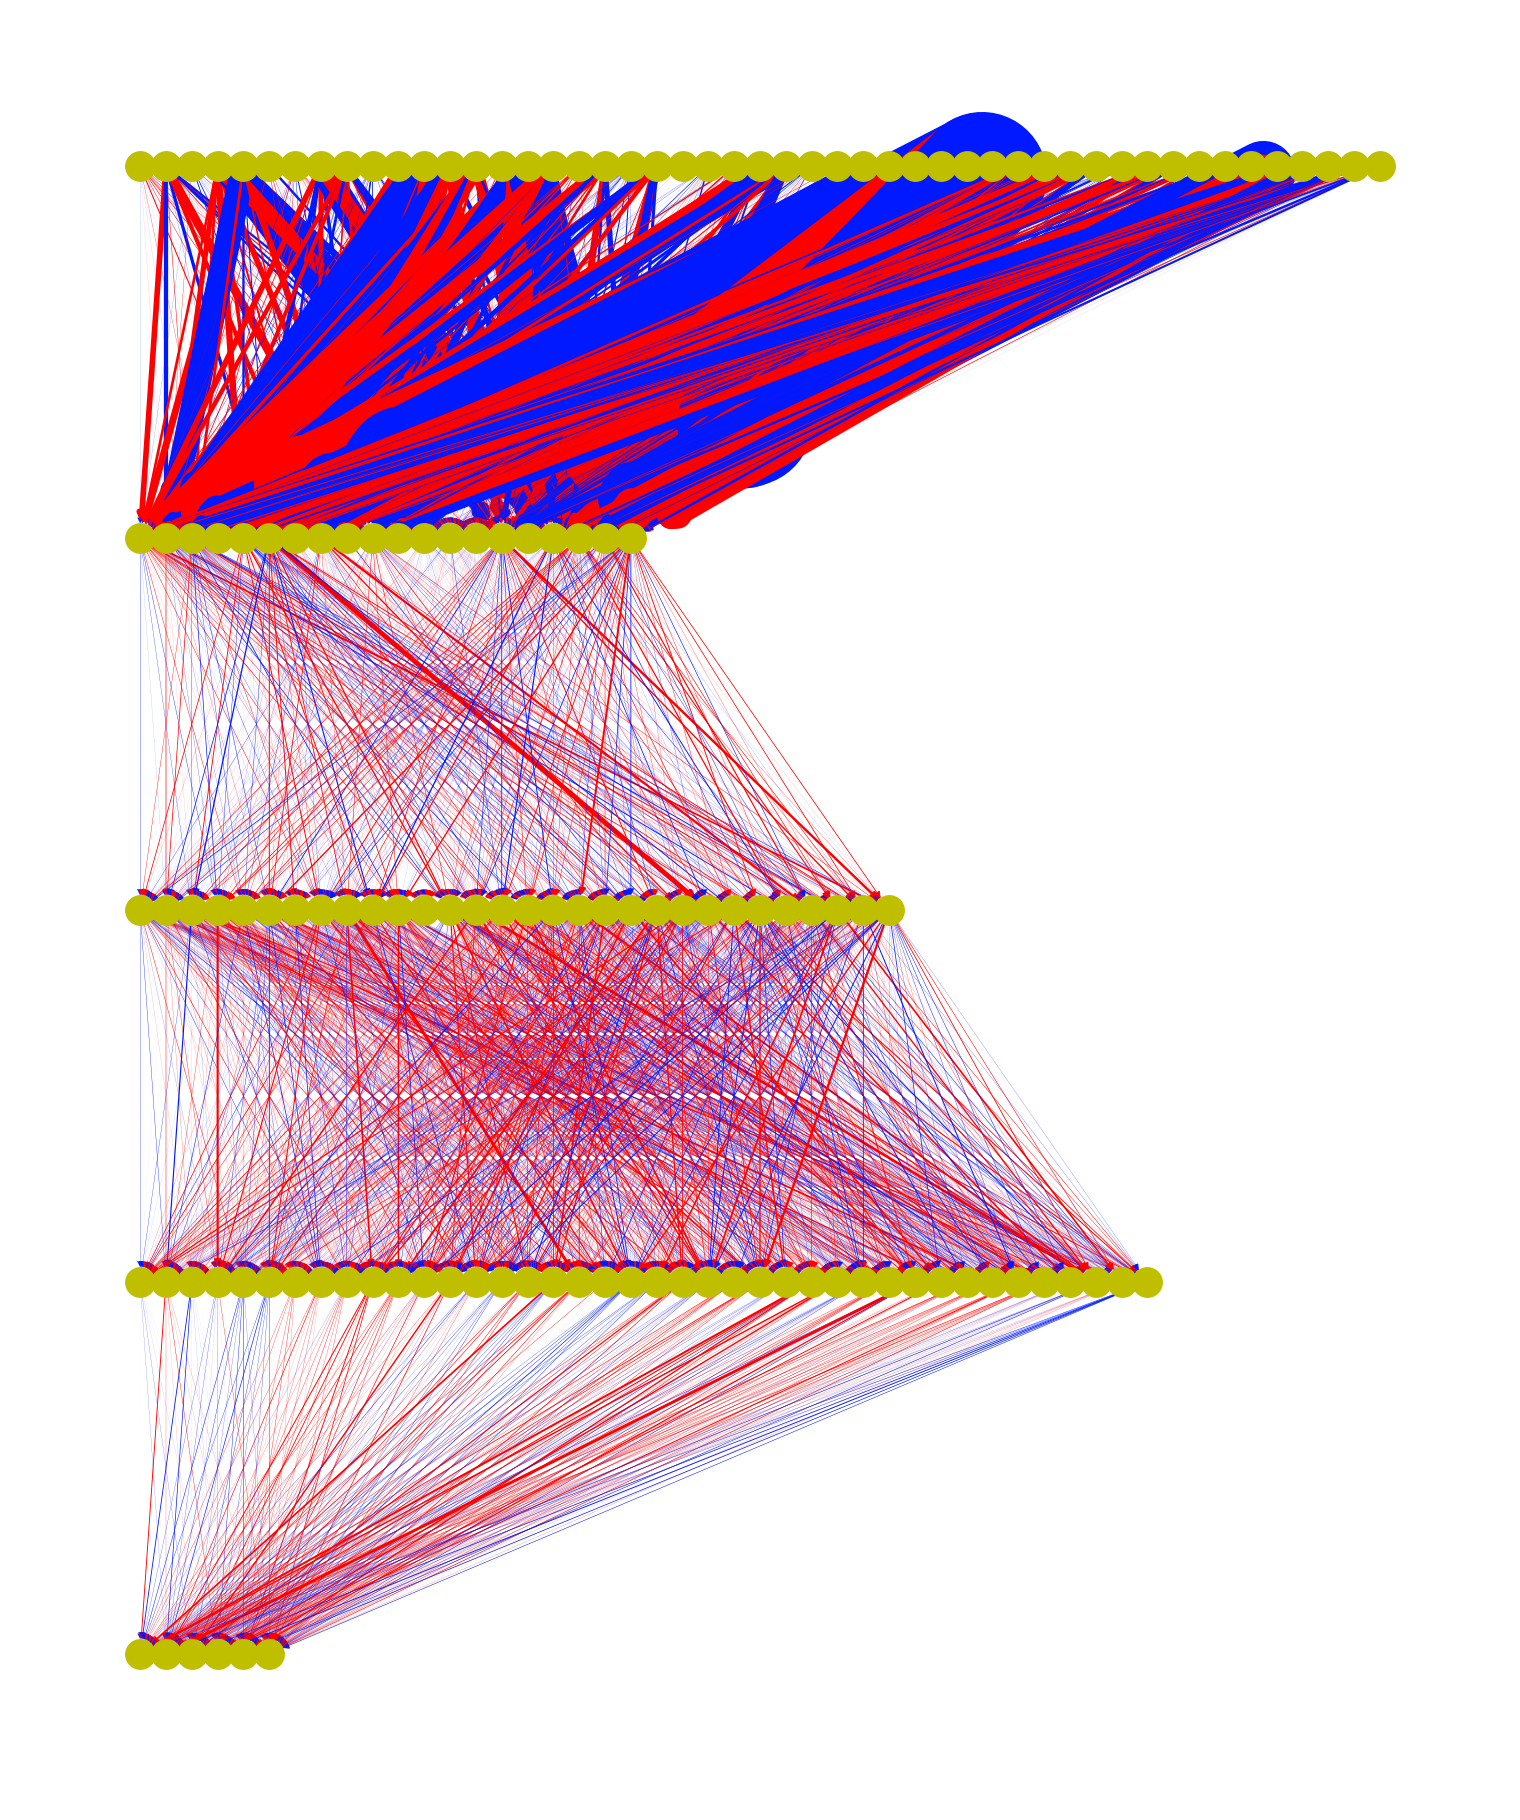

In [69]:
# you may need to install networkx with pip
model5 = MLPClassifier(hidden_layer_sizes=[50, 40, 40], max_iter=500)

import networkx as nx
import colorsys
import matplotlib.pylab as plt

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]
    plt.figure(figsize=(15, 18))
    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(model1.fit(X_train, y_train))

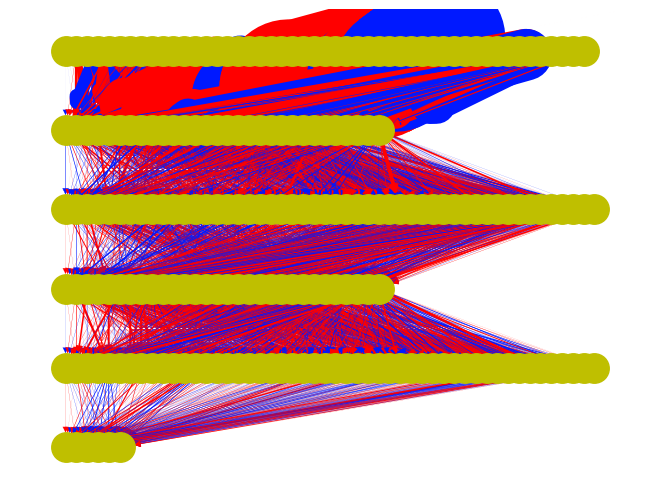

In [66]:
show_ann(model3.fit(X_train, y_train))

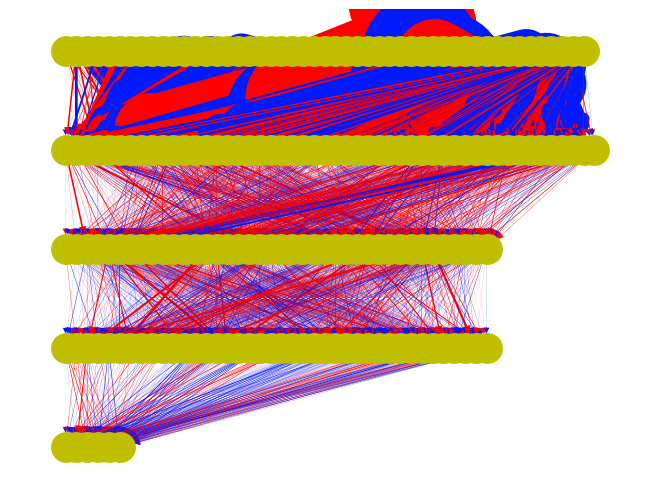

In [67]:
show_ann(model5.fit(X_train, y_train))

In [8]:
pred = model5.fit(X_train, y_train).predict(X_test)


In [10]:
pred[0:10]
y_test.value_counts()

Label
Pion        80402
Electron    80136
Proton      79988
Muon        79928
Ghost       79906
Kaon        79640
Name: count, dtype: int64

0.7080041979324093

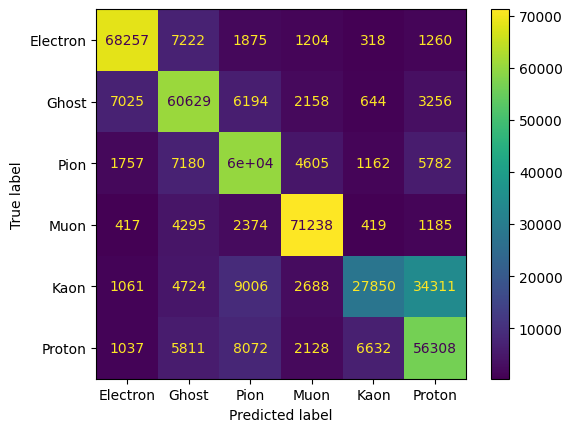

In [9]:
cm = confusion_matrix(y_test, pred, labels=['Electron', 'Ghost', 'Pion', 'Muon', 'Kaon', 'Proton'])
ConfusionMatrixDisplay(cm, display_labels=['Electron', 'Ghost', 'Pion', 'Muon', 'Kaon', 'Proton']).plot()
precision_recall_fscore_support(y_test, pred, labels=['Electron', 'Ghost', 'Pion', 'Muon', 'Kaon', 'Proton'])
f1_score(y_test, pred, average='macro')
